In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/food-101/food-101.zip
/kaggle/input/food-101/food-101/__MACOSX/._food-101
/kaggle/input/food-101/food-101/__MACOSX/food-101/._meta
/kaggle/input/food-101/food-101/__MACOSX/food-101/._.DS_Store
/kaggle/input/food-101/food-101/__MACOSX/food-101/._license_agreement.txt
/kaggle/input/food-101/food-101/__MACOSX/food-101/._README.txt
/kaggle/input/food-101/food-101/__MACOSX/food-101/._images
/kaggle/input/food-101/food-101/__MACOSX/food-101/meta/._classes.txt
/kaggle/input/food-101/food-101/__MACOSX/food-101/meta/._test.json
/kaggle/input/food-101/food-101/__MACOSX/food-101/meta/._test.txt
/kaggle/input/food-101/food-101/__MACOSX/food-101/meta/._labels.txt
/kaggle/input/food-101/food-101/__MACOSX/food-101/meta/._train.json
/kaggle/input/food-101/food-101/__MACOSX/food-101/meta/._train.txt
/kaggle/input/food-101/food-101/__MACOSX/food-101/images/._prime_rib
/kaggle/input/food-101/food-101/__MACOSX/food-101/images/._grilled_salmon
/kaggle/input/food-101/food-101/__MACOSX/food-101

In [2]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2

In [3]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.16.1
/device:GPU:0


In [4]:
%cd /kaggle/input/food-101/

/kaggle/input/food-101


In [5]:
# Helper function to download data and extract
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

### **Understand dataset structure and files**

In [12]:
# Check the extracted dataset folder
!ls food-101/food-101/

README.txt  images  license_agreement.txt  meta


In [13]:
os.listdir('food-101/food-101/images')

['macarons',
 'french_toast',
 'lobster_bisque',
 'prime_rib',
 'pork_chop',
 'guacamole',
 'baby_back_ribs',
 'mussels',
 'beef_carpaccio',
 'poutine',
 'hot_and_sour_soup',
 'seaweed_salad',
 'foie_gras',
 'dumplings',
 'peking_duck',
 'takoyaki',
 'bibimbap',
 'falafel',
 'pulled_pork_sandwich',
 'lobster_roll_sandwich',
 'carrot_cake',
 'beet_salad',
 'panna_cotta',
 'donuts',
 'red_velvet_cake',
 'grilled_cheese_sandwich',
 'cannoli',
 'spring_rolls',
 'shrimp_and_grits',
 'clam_chowder',
 'omelette',
 'fried_calamari',
 'caprese_salad',
 'oysters',
 'scallops',
 'ramen',
 'grilled_salmon',
 'croque_madame',
 'filet_mignon',
 'hamburger',
 'spaghetti_carbonara',
 'miso_soup',
 'bread_pudding',
 'lasagna',
 'crab_cakes',
 'cheesecake',
 'spaghetti_bolognese',
 'cup_cakes',
 'creme_brulee',
 'waffles',
 'fish_and_chips',
 'paella',
 'macaroni_and_cheese',
 'chocolate_mousse',
 'ravioli',
 'chicken_curry',
 'caesar_salad',
 'nachos',
 'tiramisu',
 'frozen_yogurt',
 'ice_cream',
 'ris

In [14]:
os.listdir('food-101/food-101/meta')

['test.txt',
 'train.json',
 'labels.txt',
 'test.json',
 'train.txt',
 'classes.txt']

In [15]:
!head food-101/food-101/meta/train.txt

apple_pie/1005649
apple_pie/1014775
apple_pie/1026328
apple_pie/1028787
apple_pie/1043283
apple_pie/1050519
apple_pie/1057749
apple_pie/1057810
apple_pie/1072416
apple_pie/1074856


In [16]:
!head food-101/food-101/meta/classes.txt

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito


### **Visualize random image from each of the 101 classes**

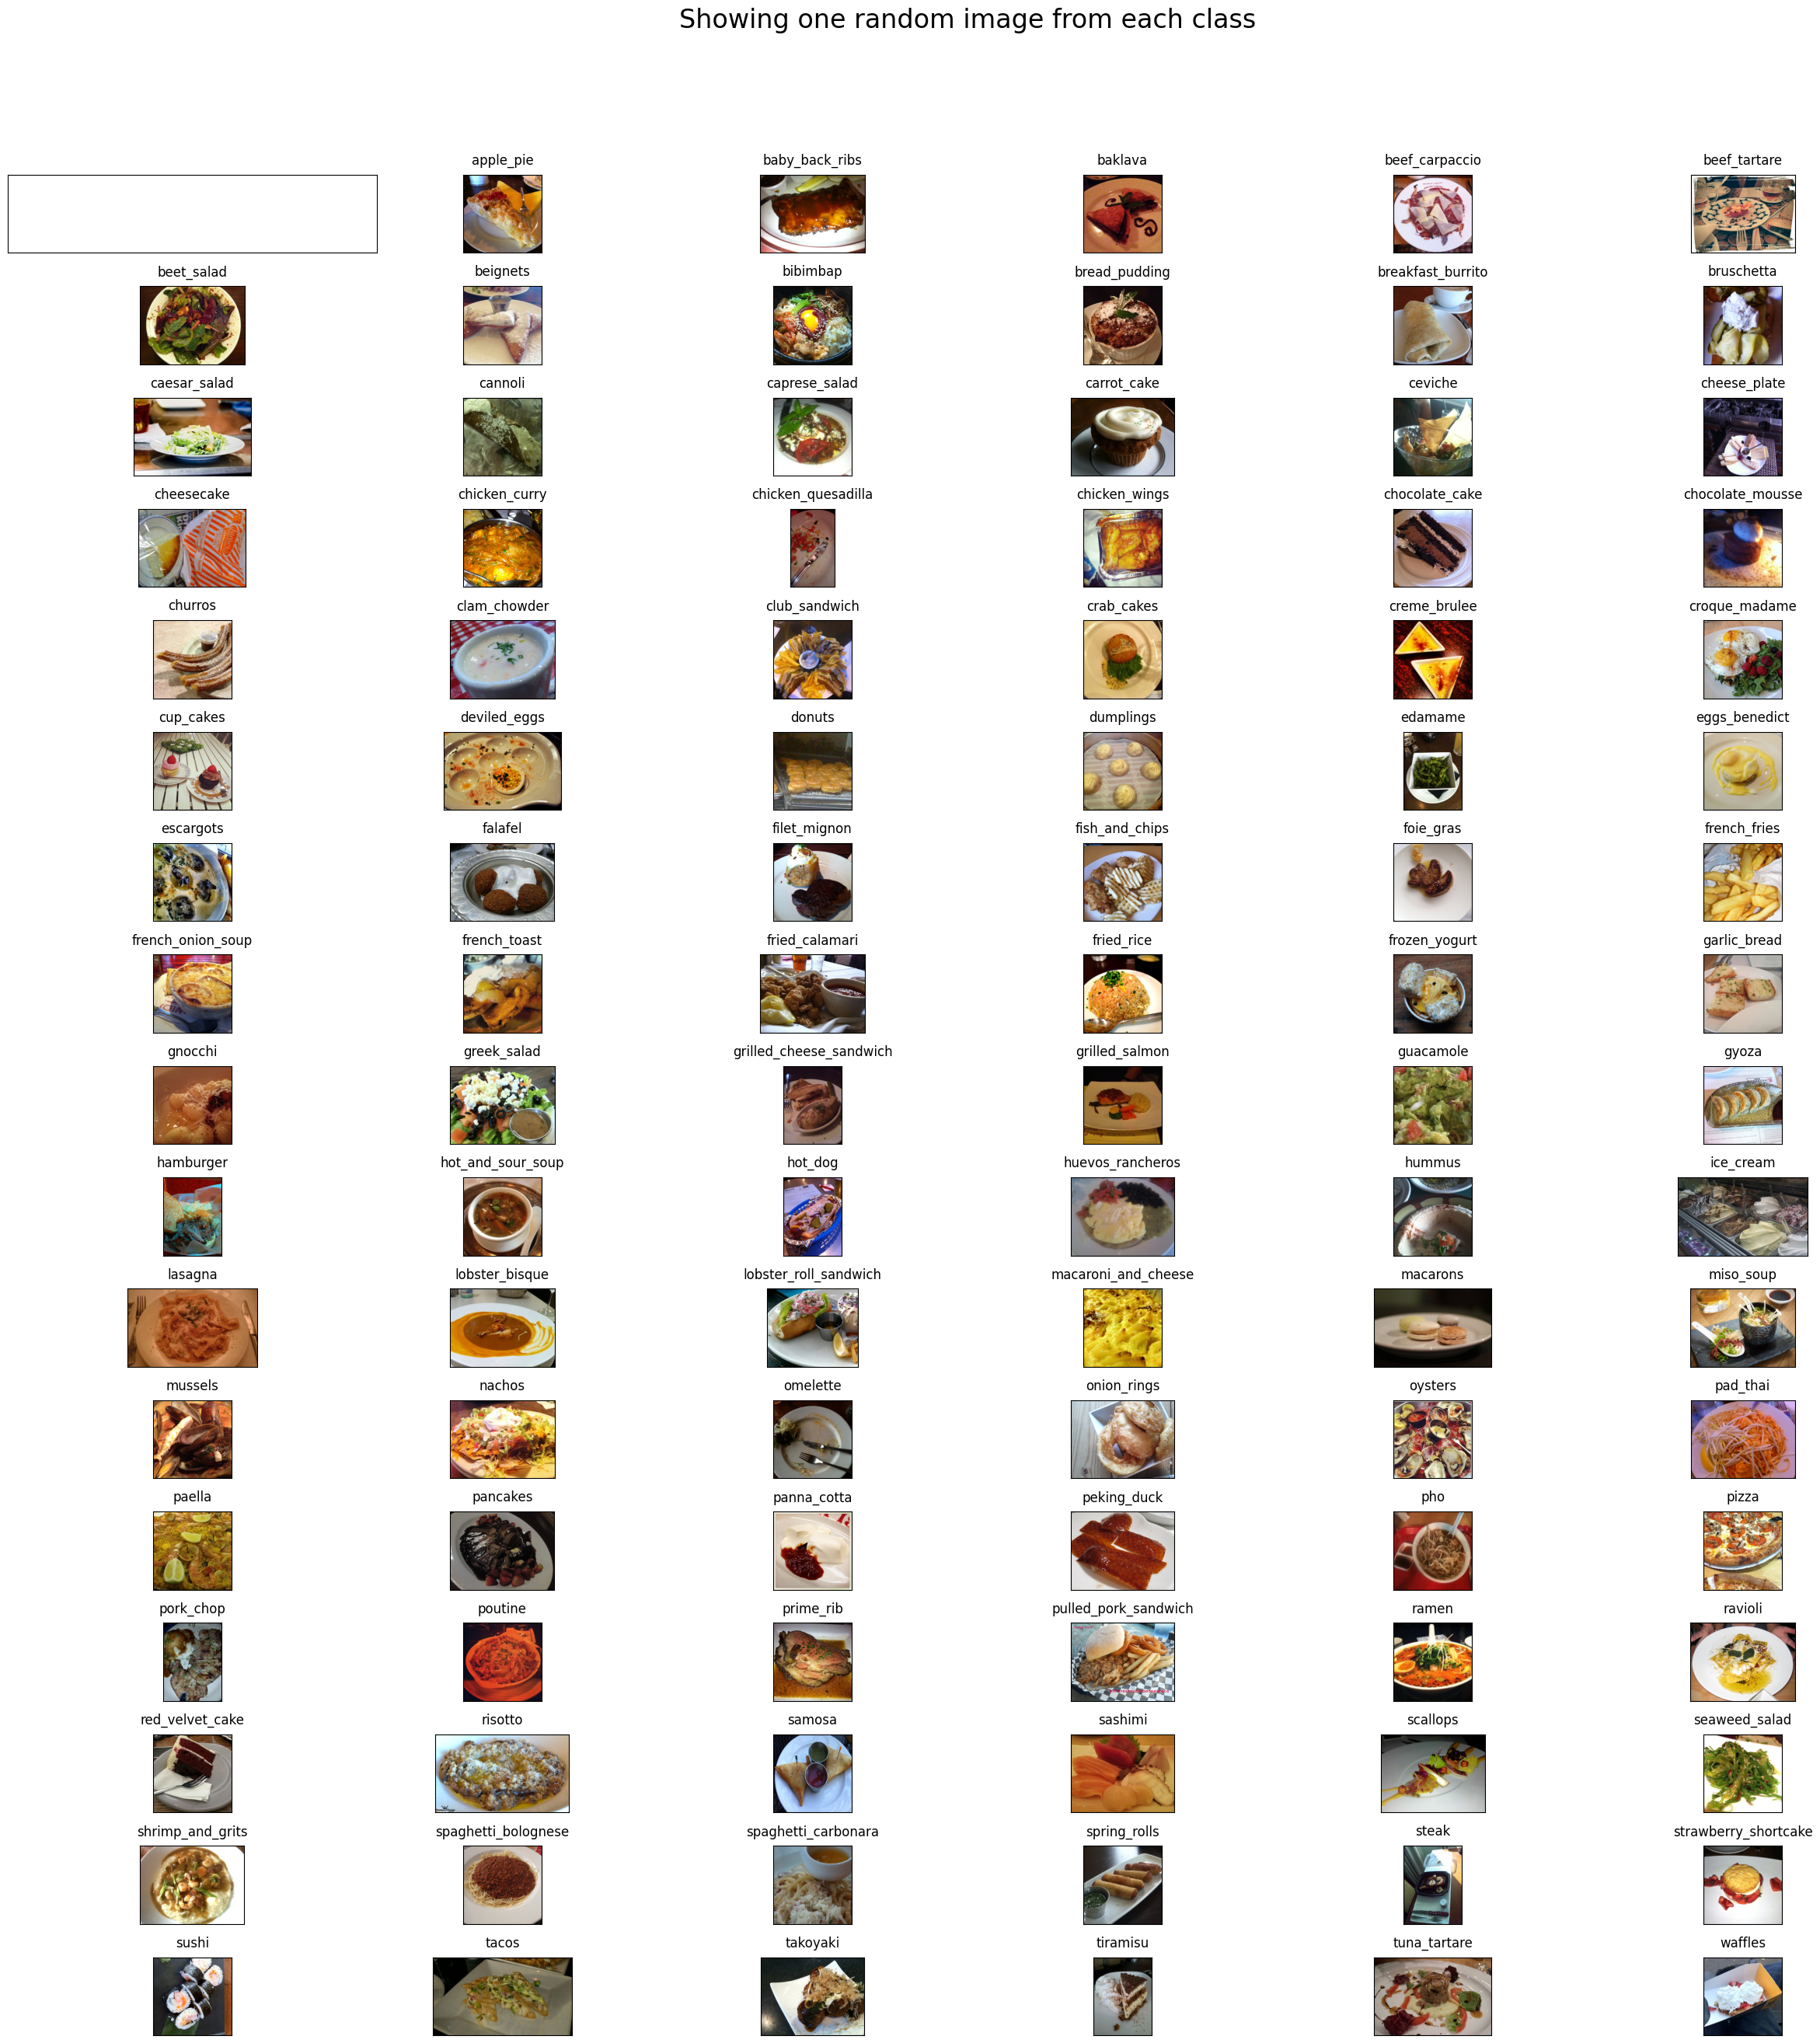

In [17]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) 
data_dir = "food-101/food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) 
    food_selected_random = np.random.choice(food_selected_images) 
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()



### **Split the image data into train and test using train.txt and test.txt**

In [19]:
# Helper method to split dataset into train and test folders
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [21]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
%cd /
print("Creating train data...")
prepare_data('/kaggle/input/food-101/food-101/food-101/meta/train.txt', '/kaggle/input/food-101/food-101/food-101/images', 'train')

/
Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying 

In [22]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('/kaggle/input/food-101/food-101/food-101/meta/test.txt', '/kaggle/input/food-101/food-101/food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [23]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


75750


In [24]:
# Check how many files are in the test folder
print("Total number of samples in test folder")
!find test -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
25250


In [26]:
os.chdir('/')

### **Create a subset of data with few classes(3) - train_mini and test_mini for experimenting**

In [27]:
# List of all 101 types of foods(sorted alphabetically)
del foods_sorted[0] 

In [28]:
foods_sorted

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [29]:
# Helper method to create train_mini and test_mini data samples
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) 
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
      

In [30]:
# picking 3 food items and generating separate data folders for the same
food_list = ['apple_pie','pizza','omelette','donuts','cup_cakes','french_toast','falafel','fried_rice','chicken_curry','hot_dog']
src_train = 'train'
dest_train = '/kaggle/working/train_mini'
src_test = 'test'
dest_test = '/kaggle/working/test_mini'

In [31]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette
Copying images into donuts
Copying images into cup_cakes
Copying images into french_toast
Copying images into falafel
Copying images into fried_rice
Copying images into chicken_curry
Copying images into hot_dog


In [32]:
print("Total number of samples in train folder")

!find /kaggle/working/train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder
7500


In [33]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette
Copying images into donuts
Copying images into cup_cakes
Copying images into french_toast
Copying images into falafel
Copying images into fried_rice
Copying images into chicken_curry
Copying images into hot_dog


In [34]:
print("Total number of samples in test folder")
!find /kaggle/working/test_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in test folder
2500


### **Fine tune ResNet50 Pretrained model using Food 101 dataset**

In [42]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Model, regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
import tensorflow.keras.backend as K

# Clear previous session
K.clear_session()

# Parameters
n_classes = 10  
img_width, img_height = 224, 224
train_data_dir = '/kaggle/working/train_mini'
validation_data_dir = '/kaggle/working/test_mini'
nb_train_samples = 2250
nb_validation_samples = 750
batch_size = 16

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

# Load the ResNet50 model pre-trained on ImageNet
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add new layers for classification
x = resnet50.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(n_classes, kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

# Create the model
model = Model(inputs=resnet50.input, outputs=predictions)

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks: ModelCheckpoint and CSVLogger
checkpointer = ModelCheckpoint(filepath='/kaggle/working/best_model_class.keras', verbose=1, save_best_only=True)
csv_logger = CSVLogger('/kaggle/working/history_3class.log')

# Train the model using fit() 
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    epochs=30,
    verbose=1,
    callbacks=[csv_logger, checkpointer])

# Save the final model
model.save('/kaggle/working/model_trained_class.keras')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.
Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1728637404.698968     225 service.cc:145] XLA service 0x78baf0005380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728637404.699037     225 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/140 ━━━━━━━━━━━━━━━━━━━━ 1:34:38 41s/step - accuracy: 0.0625 - loss: 3.0192

I0000 00:00:1728637424.900327     225 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.1258 - loss: 2.6075
Epoch 1: val_loss improved from inf to 2.80729, saving model to /kaggle/working/best_model_class.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 78s 266ms/step - accuracy: 0.1261 - loss: 2.6063 - val_accuracy: 0.1236 - val_loss: 2.8073
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.3032 - loss: 2.0866
Epoch 2: val_loss did not improve from 2.80729
140/140 ━━━━━━━━━━━━━━━━━━━━ 33s 236ms/step - accuracy: 0.3034 - loss: 2.0860 - val_accuracy: 0.0910 - val_loss: 3.6820
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.4591 - loss: 1.7619
Epoch 3: val_loss did not improve from 2.80729
140/140 ━━━━━━━━━━━━━━━━━━━━ 47s 341ms/step - accuracy: 0.4592 - loss: 1.7617 - val_accuracy: 0.1155 - val_loss: 2.9291
Epoch 4/30
 49/140 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.5367 - loss: 1.5461

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 4: val_loss did not improve from 2.80729
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.5485 - loss: 1.5129 - val_accuracy: 0.1199 - val_loss: 2.8358
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5665 - loss: 1.4964
Epoch 5: val_loss improved from 2.80729 to 2.38561, saving model to /kaggle/working/best_model_class.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 87s 243ms/step - accuracy: 0.5665 - loss: 1.4961 - val_accuracy: 0.2147 - val_loss: 2.3856
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.5867 - loss: 1.3494
Epoch 6: val_loss improved from 2.38561 to 1.81055, saving model to /kaggle/working/best_model_class.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 34s 241ms/step - accuracy: 0.5869 - loss: 1.3489 - val_accuracy: 0.3899 - val_loss: 1.8105
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.6202 - loss: 1.2285
Epoch 7: val_loss improved from 1.81055 to 1.11613, saving model to /kaggle/working/best_model_class.keras
140/140 

In [43]:
model.save('/kaggle/working/model1_trained_class.h5')

In [44]:
class_map_3 = train_generator.class_indices
class_map_3

{'apple_pie': 0,
 'chicken_curry': 1,
 'cup_cakes': 2,
 'donuts': 3,
 'falafel': 4,
 'french_toast': 5,
 'fried_rice': 6,
 'hot_dog': 7,
 'omelette': 8,
 'pizza': 9}

### **Visualize the accuracy and loss plots**

In [49]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

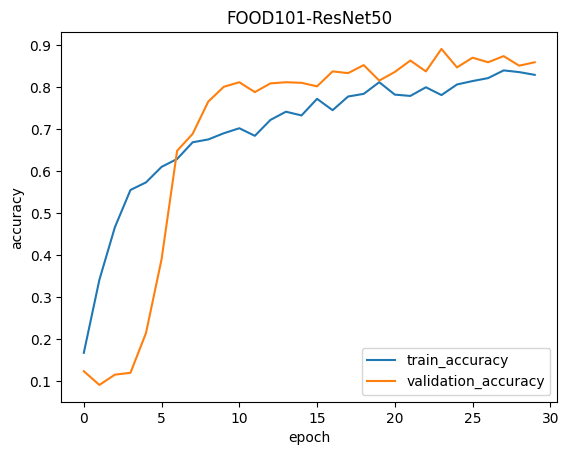

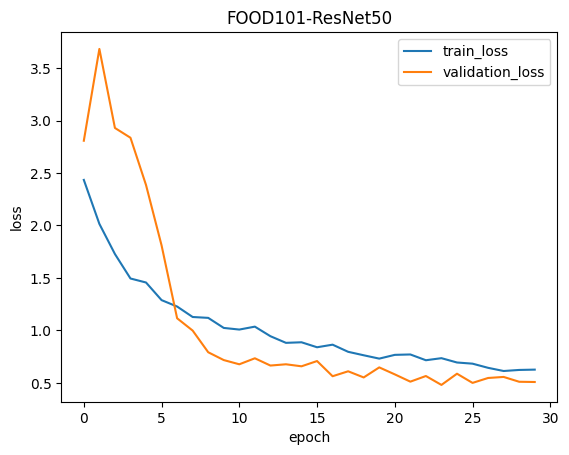

In [50]:
plot_accuracy(history,'FOOD101-ResNet50')
plot_loss(history,'FOOD101-ResNet50')

### **Predicting classes for new images from internet using the best trained model**

In [54]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('/kaggle/working/best_model_class.keras',compile = False)

CPU times: user 5.58 s, sys: 839 ms, total: 6.42 s
Wall time: 6.4 s


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Function to preprocess and predict a single image
def predict_image(img_path, model, img_width, img_height):
    # Load the image and resize it to the target size
    img = image.load_img(img_path, target_size=(img_width, img_height))
    
    # Convert the image to array format
    img_array = image.img_to_array(img)
    
    # Rescale pixel values from 0-255 to 0-1
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0
    
    # Make prediction
    prediction = model.predict(img_array)
    
    # Get the predicted class (index of highest probability)
    predicted_class = np.argmax(prediction, axis=1)
    
    return predicted_class, prediction

# Example usage
img_path = '/kaggle/working/test_image.jpg'  # Replace with your image path
predicted_class, prediction_probs = predict_image(img_path, model_best, 224, 224)

# Print the prediction result
print(f'Predicted class: {predicted_class[0]}')
print(f'Prediction probabilities: {prediction_probs}')


In [55]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(224, 224))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()